In [1]:
#Classification
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
/nClass Distribution Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


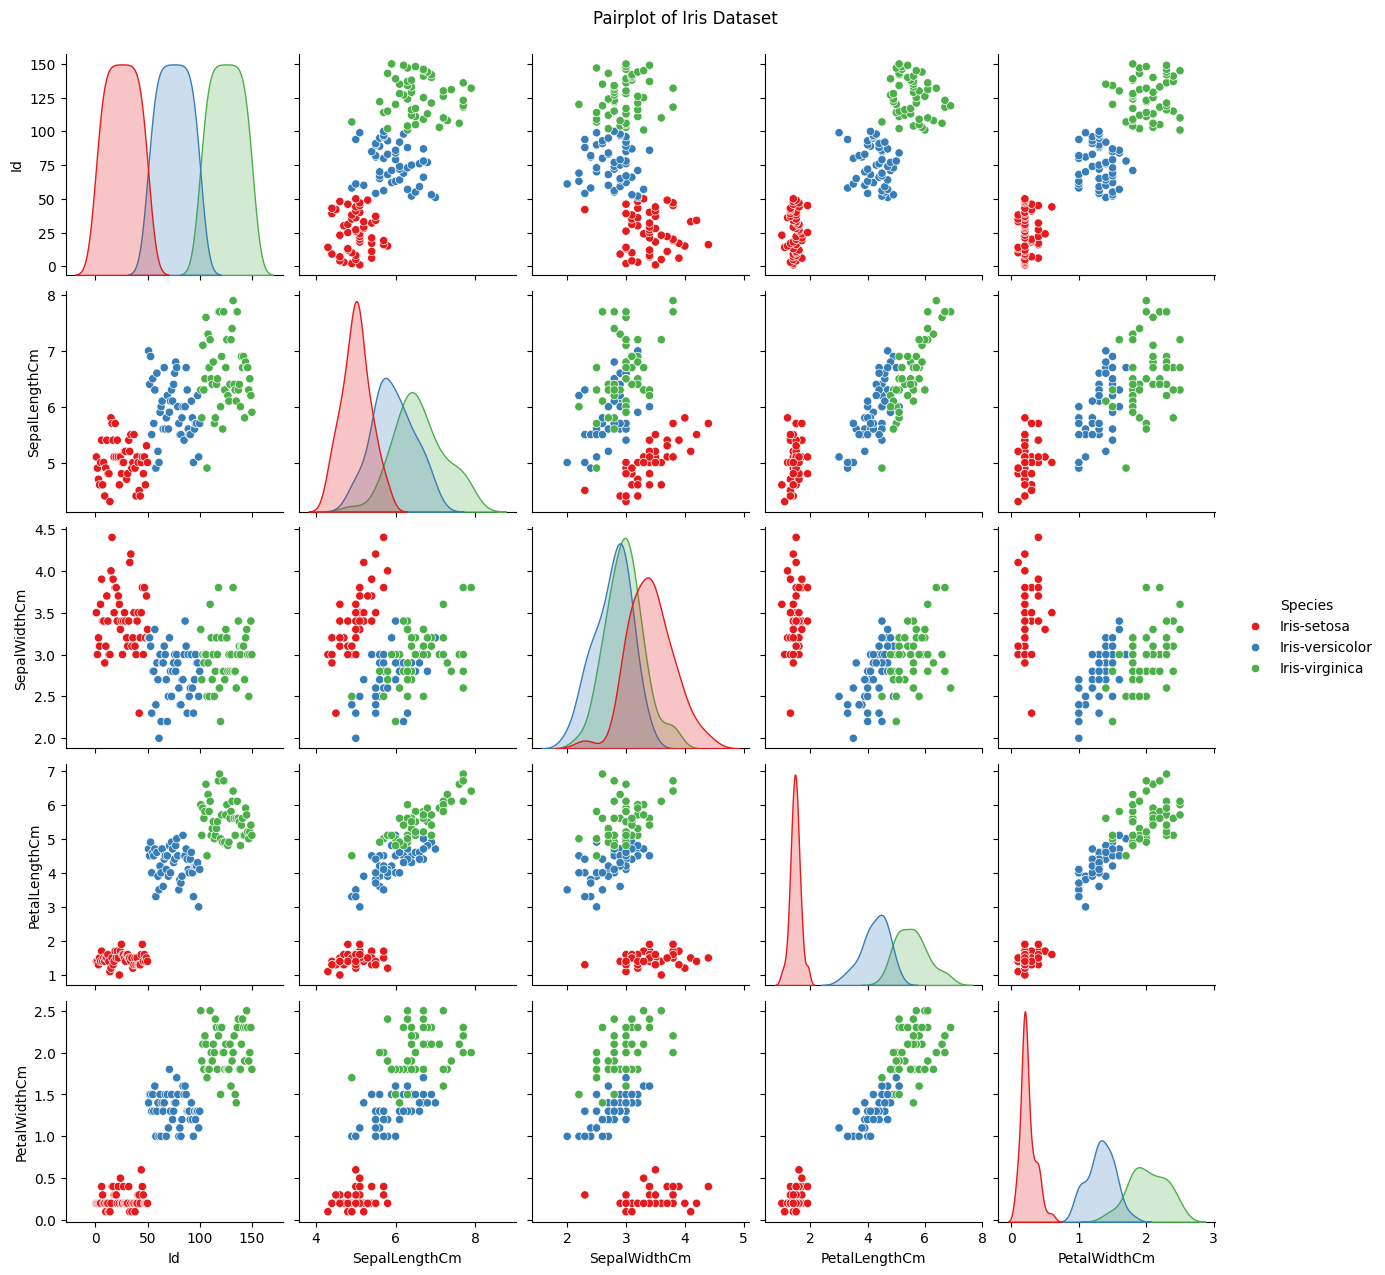

Accuracy  1.0

Classfication Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



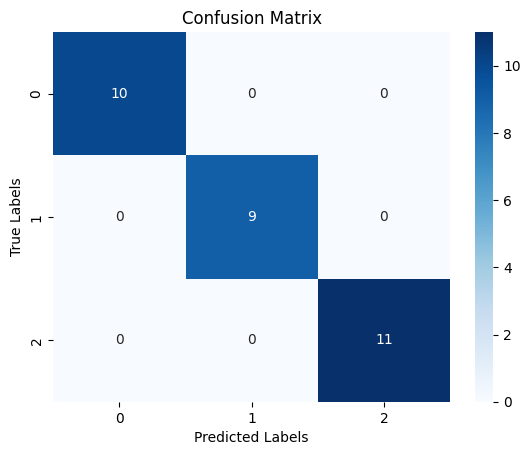

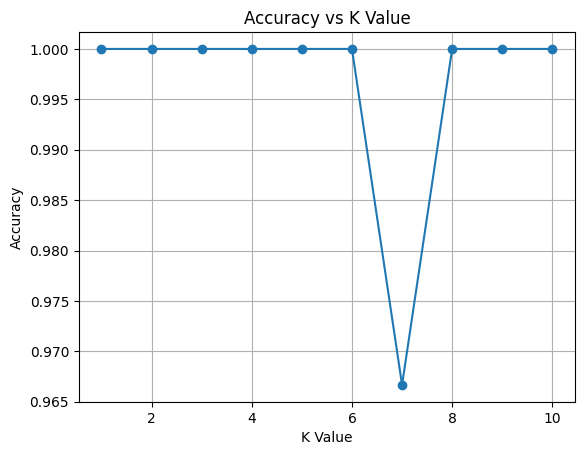

In [4]:
# Load Dataset from csv
df = pd.read_csv('/content/Iris.csv')

#Explore the data
print(df.head())
print("/nClass Distribution",df['Species'].value_counts())

#Visualize the data
sns.pairplot(df,hue='Species',palette='Set1')
plt.suptitle('Pairplot of Iris Dataset',y=1.02)
plt.show()

# Encode Labels
le = LabelEncoder()
df['Species_Encoded'] = le.fit_transform(df['Species'])

#split data
x = df.drop(['Id','Species','Species_Encoded'],axis=1)
y = df['Species_Encoded']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#train a KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

# Evaluate
y_pred = knn.predict(x_test)
print("Accuracy ", accuracy_score(y_test,y_pred))
print("\nClassfication Report:\n",
      classification_report(y_test,y_pred))

#confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,
            fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Tune K value
accuracies = []
for k in range(1,11):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train,y_train)
  acc = accuracy_score(y_test,model.predict(x_test))
  accuracies.append(acc)

# plot k vs accuracy
plt.plot(range(1,11),accuracies,marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K Value')
plt.grid(True)
plt.show()